# Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
from sklearn.model_selection import train_test_split

import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [2]:
data_location = "bank-full.csv"
data_url = 'https://github.com/diwakarsachan/marketing-project-final/raw/main/bank-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: bank-full.csv


In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None) 

marketing_outcome = pd.read_csv(data_location, sep=';')
print('Orignal Shape of the data : ',marketing_outcome.shape)


Orignal Shape of the data :  (45211, 17)


# Shape Data

In [4]:
numeric_data = marketing_outcome.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns

In [5]:
marketing_outcome =marketing_outcome.replace({'default': {'yes': 1, 'no': 0}, 'housing': {'yes': 1, 'no': 0}, 'loan': {'yes': 1, 'no': 0}, 'y': {'yes': 1, 'no': 0}})

In [6]:
categorical_col = marketing_outcome.select_dtypes(include='O')
marketing_outcome = pd.get_dummies(marketing_outcome, columns=[col for col in marketing_outcome.columns if col in categorical_col])

In [7]:
# Numeric Columns for Scaling
df_numeric = marketing_outcome[numeric_col]

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax_scalar = MinMaxScaler()
nd_numeric_transform = minmax_scalar.fit_transform(df_numeric)

In [9]:
df_numeric_transform=pd.DataFrame(np.array(nd_numeric_transform))
df_numeric_transform.columns = numeric_col
df_numeric_transform.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.52,0.09,0.13,0.05,0.00,0.00,0.00
1,0.34,0.07,0.13,0.03,0.00,0.00,0.00
2,0.19,0.07,0.13,0.02,0.00,0.00,0.00
3,0.38,0.09,0.13,0.02,0.00,0.00,0.00
4,0.19,0.07,0.13,0.04,0.00,0.00,0.00


In [10]:
non_numeric_columns = [i for i in marketing_outcome.columns if i not in numeric_col]
marketing_outcome_final = pd.concat([df_numeric_transform, marketing_outcome[non_numeric_columns]], axis=1) 
marketing_outcome_final.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.52,0.09,0.13,0.05,0.00,0.00,0.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.34,0.07,0.13,0.03,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.19,0.07,0.13,0.02,0.00,0.00,0.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.38,0.09,0.13,0.02,0.00,0.00,0.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.19,0.07,0.13,0.04,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# Feature Engineering

In [11]:
label_col = 'y'

feature_columns = marketing_outcome_final.columns
feature_columns = feature_columns.drop (['y'])
print (feature_columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [12]:
X = marketing_outcome_final[feature_columns]
y = marketing_outcome_final[[label_col]]

print (X.shape)
print (y.shape)

(45211, 48)
(45211, 1)


# Test Train Split

In [13]:
X_train,X_test,y_train, y_test = train_test_split(X, y,  test_size=.2, random_state=42)

print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (36168, 48)
x_test : (9043, 48)
y_train : (36168, 1)
y_test : (9043, 1)


# Over sample to fix the imbalace

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable also ensure you dont oversample on test data
X_trainsm, y_trainsm = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y_train))
print('Resample dataset shape', len(y_trainsm))

Original dataset shape 36168
Resample dataset shape 63940


In [15]:
# Check for impbalnce on final train data
y_trainsm.value_counts(normalize=True)

y
0   0.50
1   0.50
dtype: float64

# Algorithm

In [26]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,f1_score

# Function to print the performance of algo
def algo_stats(model, X_train, y_train, X_test, y_test):

  print("Model Analysis :", model)
  y_pred = model.predict (X_test)

  model_f1_score = f1_score(y_test, y_pred)
  print("F1 Score: ", model_f1_score)

  train_accuracy = model.score(X_train,y_train)
  print ("Train accuracy: ", train_accuracy)

  test_accuracy = model.score(X_test, y_test)
  print ("Test accuracy: ", test_accuracy)

  auc = roc_auc_score(y_test, y_pred)
  print('ROC_AUC_SCORE is', auc)

  print('Classification Report:')
  print(classification_report(y_test,y_pred))

  cm_labels = np.unique(y)
  cm_array = confusion_matrix(y_test, y_pred)
  cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)  
  plt.figure(figsize = (8,5))

  # colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
  sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='d').plot()
  plt.show()

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  print('false_positive_rate: ', false_positive_rate)
  print('true_positive_rate: ', true_positive_rate)
  print('thresholds: ', thresholds)

  plt.plot(false_positive_rate, true_positive_rate)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC curve')
  plt.show()
  print('===='*20)

# Basic Random Forest 

In [24]:
%%time
from sklearn.ensemble import RandomForestClassifier

algo = RandomForestClassifier()

# Fit
model = algo.fit(X_trainsm, np.ravel(y_trainsm))
print (model)

RandomForestClassifier()
CPU times: user 9.22 s, sys: 55.5 ms, total: 9.28 s
Wall time: 9.25 s


Model Analysis : RandomForestClassifier()
F1 Score:  0.5961300946891726
Train accuracy:  1.0
Test accuracy:  0.8915183014486343
ROC_AUC_SCORE is 0.7931990430207275
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7952
           1       0.54      0.66      0.60      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.79      0.77      9043
weighted avg       0.90      0.89      0.90      9043



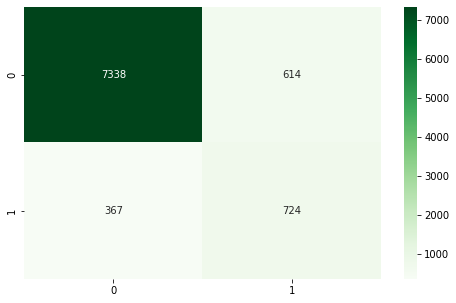

false_positive_rate:  [0.         0.07721328 1.        ]
true_positive_rate:  [0.         0.66361137 1.        ]
thresholds:  [2 1 0]


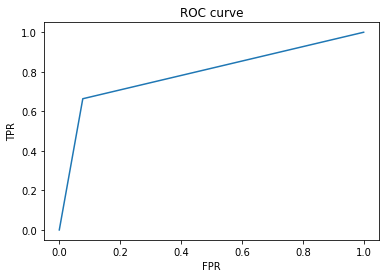

In [27]:
algo_stats(model, X_trainsm, y_trainsm, X_test, y_test)

# Hyper Paramater Tuning

In [28]:
%%time 

## Bulid a param grid for RandomForest
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

algo = RandomForestClassifier()
algo.get_params()

# build a param-grid
param_grid =  {'n_estimators' : (50, 100, 150), 
               'max_depth' : (5,10,15,20,25),
               'max_features': ['auto', 'sqrt', 'log2'],
               'criterion' :['gini', 'entropy']
               }

grid_search = GridSearchCV(estimator=algo, 
                             param_grid=param_grid, 
                             cv = 5, 
                             scoring='roc_auc', # use roc_auc instead of "accuracy"
                             return_train_score=True,
                             n_jobs = -1)

grid_search_results = grid_search.fit (X_trainsm,np.ravel(y_trainsm))

best_model = grid_search_results.best_estimator_
print ("Best model : ", best_model)
print ("Best hyper params : ", grid_search_results.best_params_)
print ("Best score : ", grid_search_results.best_score_)

Best model :  RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=150)
Best hyper params :  {'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 150}
Best score :  0.9898641731784636
CPU times: user 29.3 s, sys: 2.07 s, total: 31.4 s
Wall time: 42min 39s


In [29]:
grid_search_results

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 10, 15, 20, 25),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (50, 100, 150)},
             return_train_score=True, scoring='roc_auc')

Model Analysis : RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=150)
F1 Score:  0.6001577287066245
Train accuracy:  0.9972161401313732
Test accuracy:  0.8878690699988941
ROC_AUC_SCORE is 0.8057545548266686
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7952
           1       0.53      0.70      0.60      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.81      0.77      9043
weighted avg       0.90      0.89      0.89      9043



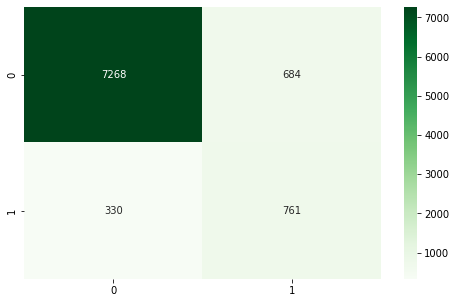

false_positive_rate:  [0.        0.0860161 1.       ]
true_positive_rate:  [0.         0.69752521 1.        ]
thresholds:  [2 1 0]


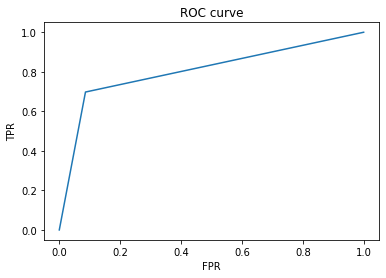

In [30]:
algo_stats(best_model, X_trainsm, y_trainsm, X_test, y_test)

# Multple Algo Performance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

## Choose models, we want to compare
## TODO: Here are we are choosing 'default' models
## What if we choose the 'best of' for each model using hyper tuning

models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

accuracy_results = []
f1_results = []
roc_auc_results = []
names = []

## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']
y2 = np.ravel(y_trainsm)
x2 = X_trainsm
for name, model in models:
    print ('\n========= ', name , ' =========')
    kfold = KFold(n_splits=10)
    
    ## cv can be int or kfold
    cv_results = cross_validate(model, x2, y2, cv=kfold, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)

    # test accuracy
    this_result = cv_results['test_accuracy']
    accuracy_results.append(this_result)
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))
    

    # f1 accuracy
    this_result = cv_results['test_f1']
    f1_results.append(this_result)
    names.append(name)
    print("\n{}: F1 : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))

    # roc_auc accuracy
    this_result = cv_results['test_roc_auc']
    roc_auc_results.append(this_result)
    names.append(name)
    print("\n{}: ROC AUC : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result), np.median(this_result), np.std(this_result), this_result))


In [ ]:
# Visualize F1 Results 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))

# boxplot algorithm comparison
ax = sns.boxplot(data=f1_results) # 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('accuracy')
plt.show()

# Ensemble / Voting Classifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier

# models to use for ensembling and with best parameters   
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()

# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(X_trainsm,y_trainsm)

# predicting balues and getting the metrics
y_pred = model.predict(y_test)